In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

In [4]:
from polymer_MD_analysis import pers_length, get_rg_pers_poly, bavg_pers_cnt

## PEG/acetone system analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_peg_ace = mda.Universe("n6peg_prod_ace/n6pegonly_ace.pdb", "n6peg_prod_ace/noace_n6peg.xtc")

In [6]:
n6_peg_ace.trajectory

<XTCReader n6peg_prod_ace/noace_n6peg.xtc with 18001 frames of 45 atoms>

In [7]:
len(n6_peg_ace.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
peg_n6ace = n6_peg_ace.select_atoms("resname sPEG PEG tPEG and not type H")

In [9]:
crv_n6peg_ace = pers_length(peg_n6ace,6)
crv_n6peg_ace

array([[ 1.        ,  0.99579846,  0.99404811,  0.98916235,  0.98047179],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  8.44302886, 11.34170102]])

In [10]:
com_bond = np.zeros(shape=(1,18000))
count = 0
for ts in n6_peg_ace.trajectory[0:18000]:
    n6_mon1_ace = n6_peg_ace.select_atoms("resid 1")
    n6_mon2_ace = n6_peg_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1_ace.center_of_mass(), n6_mon2_ace.center_of_mass(), 
                                                   box=n6_peg_ace.trajectory.ts.dimensions)
    com_bond[0, count] = oo_len
    count += 1
    

In [11]:
com_bond

array([[3.37363529, 3.03174885, 2.63422082, ..., 3.14400526, 2.96696237,
        3.36570245]])

In [12]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2442991909861867

In [13]:
np.std(com_bond)

0.17413480862198993

### Radius of Gyration vs. time N = 6 PEG/acetone

In [15]:
n6peg_rgens_ace, cor_n6peg_ace, N6peg_cos_ace, rgace_n6peg = get_rg_pers_poly(peg_n6ace, n6_peg_ace, 0, 18000)

In [16]:
n6peg_rgens_ace[0].shape

(18000,)

In [17]:
cor_n6peg_ace[3]

array([0., 1., 2., 3., 4.])

In [18]:
N6peg_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99579846, 0.89681474, 0.8193342 , ..., 0.92146634, 0.90184452,
        0.902351  ],
       [0.99404811, 0.86346259, 0.75306257, ..., 0.82489014, 0.70570277,
        0.76083942],
       [0.98916235, 0.81682532, 0.76855268, ..., 0.78035462, 0.50733514,
        0.6381224 ],
       [0.98047179, 0.98233821, 0.74762672, ..., 0.5512116 , 0.26220114,
        0.13905816]])

In [19]:
rgace_n6peg

3.8228189530528858

In [20]:
np.std(n6peg_rgens_ace)

0.6724811785700978

In [21]:
trj_len = np.arange(18000)

#trj_len += 1
trj_len


array([    0,     1,     2, ..., 17997, 17998, 17999])

(0.2, 2)

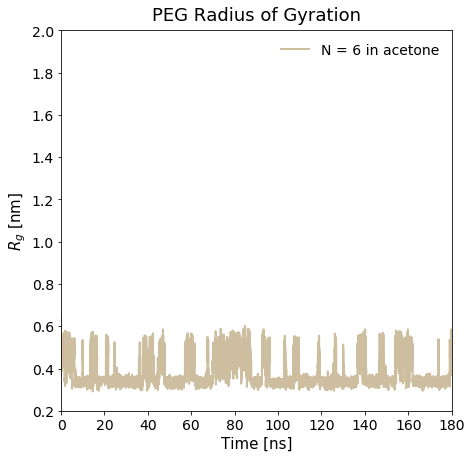

In [22]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PEG/acetone

In [25]:
# x values
blen_ace = cor_n6peg_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676])

In [26]:
mk_n6p_ace = cor_n6peg_ace[1]/cor_n6peg_ace[0]
mk_n6p_ace

array([5.65318083e-17, 5.20663261e-02, 2.20975193e-01, 6.62772183e-01,
       1.52665649e+00])

<ErrorbarContainer object of 3 artists>

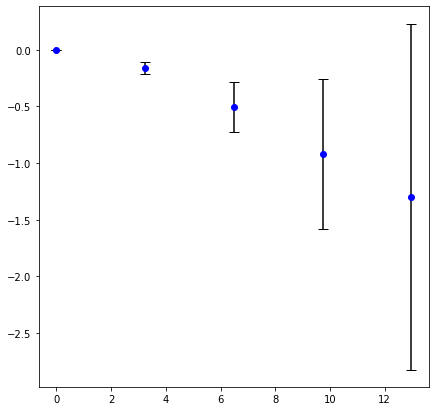

In [27]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [33]:
# All the points give the best fits for N = 6 peg in water
n6_blkspeg_ace , n6peg_fitslpace = bavg_pers_cnt(5, peg_n6ace, n6_peg_ace, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 10.427322654367762
Error in Lp from fit [Angstroms], 95% CL: 2.4701748248591695
R2 score: 0.9702843758514513
6000
9000
Lp [Angstroms]: 13.775705286198143
Error in Lp from fit [Angstroms], 95% CL: 3.4511310328831564
R2 score: 0.9670774205773076
9000
12000
Lp [Angstroms]: 10.189399241418792
Error in Lp from fit [Angstroms], 95% CL: 2.3069662533528428
R2 score: 0.9726228017477432
12000
15000
Lp [Angstroms]: 9.105450410420946
Error in Lp from fit [Angstroms], 95% CL: 2.6635545999343377
R2 score: 0.9567756190412195
15000
18000
Lp [Angstroms]: 9.852550509964939
Error in Lp from fit [Angstroms], 95% CL: 2.886326453070359
R2 score: 0.9567666826845954


In [34]:
n6_blkspeg_ace

{'Avg Radius of gyration': array([3.75291919, 4.20714331, 3.66405896, 3.6556084 , 3.80455566]),
 'Avg persistence length': array([10.42732265, 13.77570529, 10.18939924,  9.10545041,  9.85255051])}

In [35]:
n6peg_fitslpace

array([[ 1.04273227e+01,  1.37757053e+01,  1.01893992e+01,
         9.10545041e+00,  9.85255051e+00],
       [ 2.47017482e+00,  3.45113103e+00,  2.30696625e+00,
         2.66355460e+00,  2.88632645e+00],
       [-9.59018948e-02, -7.25915646e-02, -9.81412129e-02,
        -1.09824331e-01, -1.01496562e-01],
       [ 7.04738094e-03,  4.51576299e-03,  6.74142614e-03,
         1.40922743e-02,  1.20714609e-02]])

In [36]:
n6peg_fitslpace[2]

array([-0.09590189, -0.07259156, -0.09814121, -0.10982433, -0.10149656])

In [37]:
np.mean(n6peg_fitslpace[3])

0.008893661062570352

In [38]:
def line_fit(slope, x):
    return slope*x 

In [39]:
blen_ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676])

In [40]:
gg_n6peg_ace = line_fit(np.mean(n6peg_fitslpace[2]),blen_ace)

In [41]:
gg_n6peg_ace

array([-0.        , -0.31012617, -0.62025234, -0.93037851, -1.24050468])

### Block averaged Radius of gyration and persistence length, N = 6 PEG/acetone

In [42]:
np.mean(n6_blkspeg_ace["Avg persistence length"])

10.670085620474117

In [43]:
np.std(n6_blkspeg_ace["Avg persistence length"])

1.6156307596915374

In [44]:
np.mean(n6_blkspeg_ace["Avg Radius of gyration"])

3.816857104232489

In [45]:
np.std(n6_blkspeg_ace["Avg Radius of gyration"])

0.2029340409722713

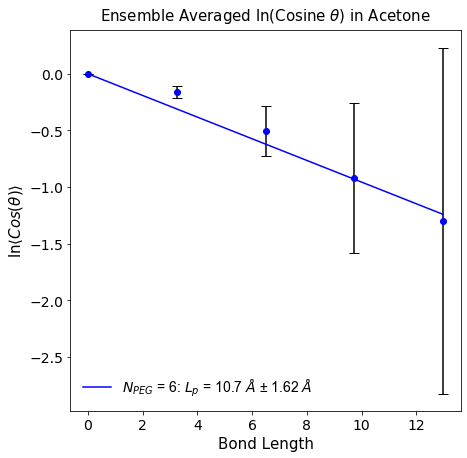

In [46]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ace, gg_n6peg_ace, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in Acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [126]:
rgpeg_olig_ace =  pd.DataFrame(data=n6_blkspeg_ace["Avg Radius of gyration"], columns=['$R_{g}$ [Angstrom] N = 6 PEG acetone'])
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone
0,3.752919
1,4.207143
2,3.664059
3,3.655608
4,3.804556


In [129]:
pers_pegt_ace = pd.DataFrame(data=n6_blkspeg_ace["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PEG acetone "])
pers_pegt_ace

,$L_{p}$ [Angstrom] N = 6 PEG acetone
0,10.427323
1,13.775705
2,10.189399
3,9.105450
4,9.852551


### N = 8 PEG/acetone only

In [74]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_peg_ace = mda.Universe("n8peg_prod_ace/n8pegonly_ace.pdb", "n8peg_prod_ace/noace_n8peg.xtc")

In [75]:
n8_peg_ace.trajectory

<XTCReader n8peg_prod_ace/noace_n8peg.xtc with 18001 frames of 59 atoms>

In [76]:
len(n8_peg_ace.trajectory)

18001

In [77]:
#Select the polymer heavy atoms 
peg_n8ace = n8_peg_ace.select_atoms("resname sPEG PEG tPEG and not type H")

In [78]:
crv_n8peg_ace = pers_length(peg_n8ace,8)
crv_n8peg_ace

array([[1.        , 0.99604569, 0.99323469, 0.99517532, 0.99571862,
        0.99736859, 0.999336  ],
       [0.        , 1.        , 2.        , 3.        , 4.        ,
        5.        , 6.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [79]:
com_bond_n8ace = np.zeros(shape=(1,18000))
count = 0
for ts in n8_peg_ace.trajectory[0:18000]:
    n8_mon1_ace = n8_peg_ace.select_atoms("resid 1")
    n8_mon2_ace = n8_peg_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1_ace.center_of_mass(), n8_mon2_ace.center_of_mass(), 
                                                   box=n8_peg_ace.trajectory.ts.dimensions)
    com_bond_n8ace[0, count] = oo_len
    count += 1
    

In [80]:
com_bond_n8ace

array([[3.31321728, 3.12619817, 3.167266  , ..., 3.16736569, 3.28082731,
        2.96240972]])

In [81]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2442991909861867

In [84]:
np.std(com_bond)

0.17413480862198993

In [83]:
np.mean(com_bond_n8ace)

3.219152850426667

In [82]:
np.std(com_bond_n8ace)

0.17575240783303925

### Radius of Gyration vs. time N = 8 PEG/acetone

In [85]:
n8peg_rgens_ace, cor_n8peg_ace, N8peg_cos_ace, rgace_n8peg = get_rg_pers_poly(peg_n8ace, n8_peg_ace, 0, 18000)

In [86]:
n8peg_rgens_ace[0].shape

(18000,)

In [87]:
cor_n8peg_ace[3]

array([0., 1., 2., 3., 4., 5., 6.])

In [88]:
N8peg_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99604569, 0.93257432, 0.9251242 , ..., 0.9027912 , 0.90457052,
        0.83886665],
       [0.99323469, 0.88950252, 0.88431364, ..., 0.78912983, 0.79341753,
        0.70691118],
       ...,
       [0.99571862, 0.83964193, 0.84597333, ..., 0.79958697, 0.61161589,
        0.72731349],
       [0.99736859, 0.73845263, 0.69775457, ..., 0.78960466, 0.42826952,
        0.69255541],
       [0.999336  , 0.56787048, 0.51902123, ..., 0.71893884, 0.76742263,
        0.74771258]])

In [89]:
rgace_n8peg

4.566421173872531

In [90]:
np.std(n8peg_rgens_ace)

0.8650318163322169

(0.2, 2)

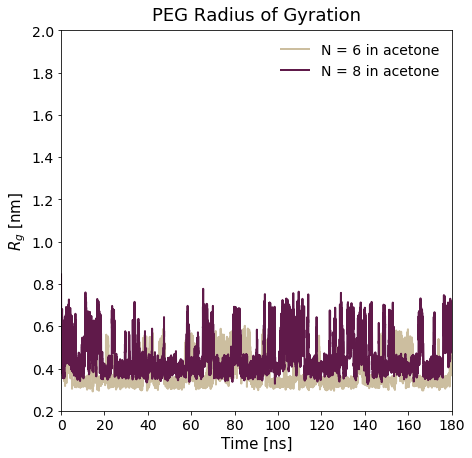

In [99]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8peg_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PEG/acetone

In [93]:
# x values
blen_n8ace = cor_n8peg_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n8ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515])

In [94]:
mk_n8p_ace = cor_n8peg_ace[1]/cor_n8peg_ace[0]
mk_n8p_ace

array([3.56598842e-17, 3.90145230e-02, 1.43199024e-01, 3.48854779e-01,
       7.26315151e-01, 1.36036897e+00, 2.47225277e+00])

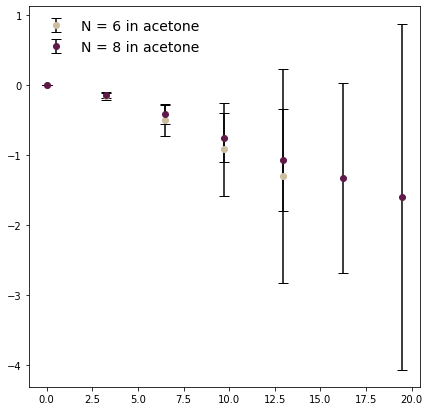

In [150]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in acetone','N = 8 in acetone'], frameon=False, fontsize=14)

In [101]:
# All the points give the best fits for N = 6 peg in water
n8_blkspeg_ace , n8peg_fitslpace = bavg_pers_cnt(5, peg_n8ace, n8_peg_ace, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 10.539570676993067
Error in Lp from fit [Angstroms], 95% CL : 1.878154613211675
R2 score: 0.9456175904846491
6000
9000
Lp [Angstroms]: 12.344046218584763
Error in Lp from fit [Angstroms], 95% CL : 1.7173331482100234
R2 score: 0.9648609563560503
9000
12000
Lp [Angstroms]: 15.047093819340482
Error in Lp from fit [Angstroms], 95% CL : 1.5362919195326807
R2 score: 0.9798613660373777
12000
15000
Lp [Angstroms]: 13.73245875606743
Error in Lp from fit [Angstroms], 95% CL : 1.758853209938992
R2 score: 0.9696790199678025
15000
18000
Lp [Angstroms]: 12.611575527388778
Error in Lp from fit [Angstroms], 95% CL : 1.8342698692638508
R2 score: 0.9619544542725256


In [102]:
n8_blkspeg_ace

{'Avg Radius of gyration': array([4.16331947, 4.4434738 , 4.84151584, 4.69910378, 4.54488306]),
 'Avg persistence length': array([10.53957068, 12.34404622, 15.04709382, 13.73245876, 12.61157553])}

In [103]:
n8peg_fitslpace

array([[ 1.05395707e+01,  1.23440462e+01,  1.50470938e+01,
         1.37324588e+01,  1.26115755e+01],
       [ 1.87815461e+00,  1.71733315e+00,  1.53629192e+00,
         1.75885321e+00,  1.83426987e+00],
       [-9.48805251e-02, -8.10107142e-02, -6.64580159e-02,
        -7.28201714e-02, -7.92922342e-02],
       [ 1.36616344e-02,  6.07030633e-03,  2.20023281e-03,
         4.15716858e-03,  6.35595396e-03]])

In [104]:
n8peg_fitslpace[2]

array([-0.09488053, -0.08101071, -0.06645802, -0.07282017, -0.07929223])

In [105]:
np.mean(n8peg_fitslpace[3])

0.006489059214964654

In [106]:
blen_n8ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515])

In [107]:
gg_n8peg_ace = line_fit(np.mean(n8peg_fitslpace[2]),blen_n8ace)

In [108]:
gg_n6peg_n8ace = line_fit(np.mean(n6peg_fitslpace[2]),blen_n8ace)

In [109]:
gg_n8peg_ace

array([-0.        , -0.25595033, -0.51190066, -0.76785099, -1.02380132,
       -1.27975165, -1.53570198])

### Block averaged Radius of gyration and persistence length, N = 8 PEG/acetone

In [110]:
np.mean(n8_blkspeg_ace["Avg persistence length"])

12.854948999674903

In [111]:
np.std(n8_blkspeg_ace["Avg persistence length"])

1.500450023082002

In [112]:
np.mean(n8_blkspeg_ace["Avg Radius of gyration"])

4.538459189886757

In [113]:
np.std(n8_blkspeg_ace["Avg Radius of gyration"])

0.23127616288836633

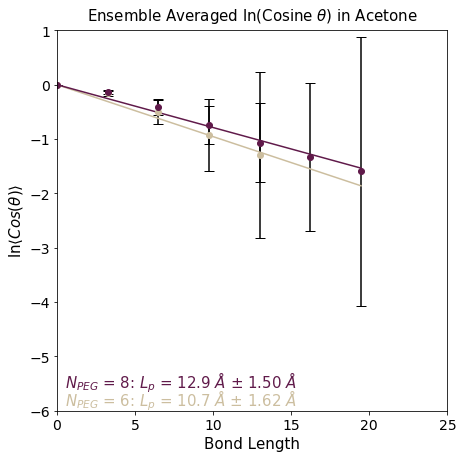

In [121]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8ace, gg_n6peg_n8ace, color='#CCBE9F')
plt.plot(blen_n8ace, gg_n8peg_ace, color='#601A4A')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in Acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,25)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 12.9 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#601A4A')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [122]:
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone
0,3.752919
1,4.207143
2,3.664059
3,3.655608
4,3.804556


In [127]:
rgpeg_olig_ace[r"$R_{g}$ [Angstrom] N = 8 PEG acetone"] = n8_blkspeg_ace["Avg Radius of gyration"]
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone
0,3.752919,4.163319
1,4.207143,4.443474
2,3.664059,4.841516
3,3.655608,4.699104
4,3.804556,4.544883


In [130]:
pers_pegt_ace[r"$L_{p}$ [Angstrom] N = 8 PEG acetone "] = n8_blkspeg_ace["Avg persistence length"]
pers_pegt_ace

,$L_{p}$ [Angstrom] N = 6 PEG acetone,$L_{p}$ [Angstrom] N = 8 PEG acetone
0,10.427323,10.539571
1,13.775705,12.344046
2,10.189399,15.047094
3,9.105450,13.732459
4,9.852551,12.611576


### N = 10 PEG/acetone only

In [131]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_peg_ace = mda.Universe("n10peg_prod_ace/n10pegonly_ace.pdb", "n10peg_prod_ace/noace_n10peg.xtc")

In [133]:
n10_peg_ace.trajectory

<XTCReader n10peg_prod_ace/noace_n10peg.xtc with 18001 frames of 73 atoms>

In [134]:
len(n10_peg_ace.trajectory)

18001

In [135]:
#Select the polymer heavy atoms 
peg_n10ace = n10_peg_ace.select_atoms("resname sPEG PEG tPEG and not type H")

In [136]:
crv_n10peg_ace = pers_length(peg_n10ace,10)
crv_n10peg_ace

array([[1.        , 0.99292359, 0.99276844, 0.99033489, 0.99034908,
        0.99310283, 0.9894771 , 0.99003329, 0.99380485],
       [0.        , 1.        , 2.        , 3.        , 4.        ,
        5.        , 6.        , 7.        , 8.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 8.31930152, 0.        , 0.        ]])

In [137]:
com_bond_n10ace = np.zeros(shape=(1,18000))
count = 0
for ts in n10_peg_ace.trajectory[0:18000]:
    n10_mon1_ace = n10_peg_ace.select_atoms("resid 1")
    n10_mon2_ace = n10_peg_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1_ace.center_of_mass(), n10_mon2_ace.center_of_mass(), 
                                                   box=n10_peg_ace.trajectory.ts.dimensions)
    com_bond_n10ace[0, count] = oo_len
    count += 1
    

In [138]:
com_bond_n10ace

array([[3.56888845, 2.96767892, 3.47360287, ..., 3.25989458, 3.33859083,
        3.22939374]])

In [81]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2442991909861867

In [84]:
np.std(com_bond)

0.17413480862198993

In [139]:
np.mean(com_bond_n10ace)

3.2197932461544663

In [140]:
np.std(com_bond_n10ace)

0.17973101109778936

### Radius of Gyration vs. time N = 10 PEG/acetone

In [141]:
n10peg_rgens_ace, cor_n10peg_ace, N10peg_cos_ace, rgace_n10peg = get_rg_pers_poly(peg_n10ace, n10_peg_ace, 0, 18000)

In [142]:
n10peg_rgens_ace[0].shape

(18000,)

In [143]:
cor_n10peg_ace[3]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [144]:
N10peg_cos_ace

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.99292359,  0.96859852,  0.94755644, ...,  0.85709543,
         0.8636019 ,  0.88675783],
       [ 0.99276844,  0.95123824,  0.89612631, ...,  0.58205585,
         0.61305566,  0.66921343],
       ...,
       [ 0.9894771 ,  0.94124163,  0.8176985 , ..., -0.20256842,
        -0.26159818, -0.31992578],
       [ 0.99003329,  0.97429879,  0.87628529, ..., -0.50909126,
        -0.68488643, -0.58293589],
       [ 0.99380485,  0.93433973,  0.89830565, ..., -0.77156813,
        -0.90684808, -0.67126232]])

In [145]:
rgace_n10peg

5.30255754277353

In [146]:
np.std(n10peg_rgens_ace)

1.0981999589311058

(0.2, 2)

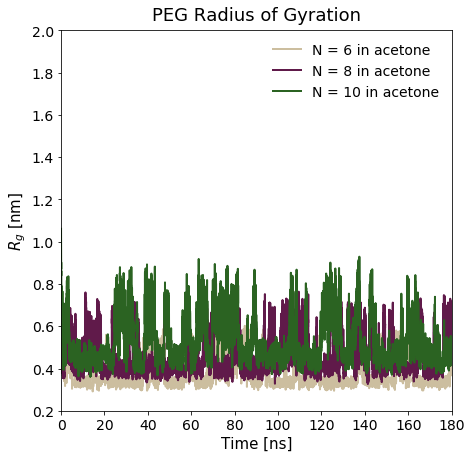

In [147]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8peg_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10peg_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 10 PEG/acetone

In [148]:
# x values
blen_n10ace = cor_n10peg_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n10ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353])

In [149]:
mk_n10p_ace = cor_n10peg_ace[1]/cor_n10peg_ace[0]
mk_n10p_ace

array([3.83522737e-17, 3.19742015e-02, 1.15105123e-01, 2.69390194e-01,
       4.95187171e-01, 7.80825676e-01, 1.06373120e+00, 1.42817487e+00,
       2.14701585e+00])

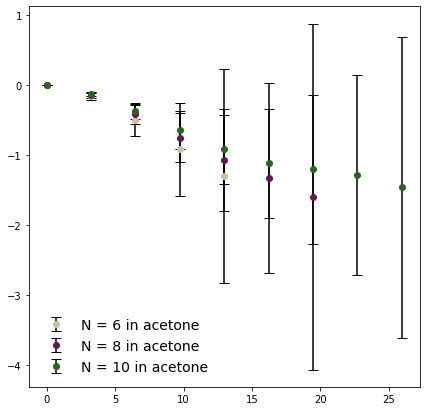

In [151]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in acetone','N = 8 in acetone', 'N = 10 in acetone'], frameon=False, fontsize=14)

In [152]:
# All the points give the best fits for N = 6 peg in water
n10_blkspeg_ace , n10peg_fitslpace = bavg_pers_cnt(5, peg_n10ace, n10_peg_ace, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 16.112347677852938
Error in Lp from fit [Angstroms], 95% CL : 0.8672847564891014
R2 score: 0.9842539687054377
6000
9000
Lp [Angstroms]: 18.476522947147622
Error in Lp from fit [Angstroms], 95% CL : 0.9306211292633078
R2 score: 0.9861852781072971
9000
12000
Lp [Angstroms]: 12.43512720363722
Error in Lp from fit [Angstroms], 95% CL : 1.2867705033153725
R2 score: 0.9490928693868165
12000
15000
Lp [Angstroms]: 17.557304118635656
Error in Lp from fit [Angstroms], 95% CL : 0.9030340849776565
R2 score: 0.9855082108835163
15000
18000
Lp [Angstroms]: 13.325468763049471
Error in Lp from fit [Angstroms], 95% CL : 1.2257038120226744
R2 score: 0.9585199830535864


In [153]:
n10_blkspeg_ace

{'Avg Radius of gyration': array([5.43622089, 5.85974086, 4.83248331, 5.65615685, 4.95316563]),
 'Avg persistence length': array([16.11234768, 18.47652295, 12.4351272 , 17.55730412, 13.32546876])}

In [154]:
n10peg_fitslpace

array([[ 1.61123477e+01,  1.84765229e+01,  1.24351272e+01,
         1.75573041e+01,  1.33254688e+01],
       [ 8.67284756e-01,  9.30621129e-01,  1.28677050e+00,
         9.03034085e-01,  1.22570381e+00],
       [-6.20642019e-02, -5.41227374e-02, -8.04173519e-02,
        -5.69563524e-02, -7.50442643e-02],
       [ 1.46292808e-03,  9.74091339e-04,  9.07686994e-03,
         1.12489453e-03,  6.24562548e-03]])

In [155]:
n10peg_fitslpace[2]

array([-0.0620642 , -0.05412274, -0.08041735, -0.05695635, -0.07504426])

In [156]:
np.mean(n10peg_fitslpace[3])

0.003776881873595879

In [157]:
blen_n10ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353])

In [158]:
gg_n10peg_ace = line_fit(np.mean(n10peg_fitslpace[2]),blen_n10ace)

In [159]:
gg_n8peg_n10ace = line_fit(np.mean(n8peg_fitslpace[2]),blen_n10ace)

In [160]:
gg_n6peg_n10ace = line_fit(np.mean(n6peg_fitslpace[2]),blen_n10ace)

In [161]:
gg_n10peg_ace

array([-0.        , -0.21321853, -0.42643705, -0.63965558, -0.85287411,
       -1.06609264, -1.27931116, -1.49252969, -1.70574822])

### Block averaged Radius of gyration and persistence length, N = 10 PEG/acetone

In [162]:
np.mean(n10_blkspeg_ace["Avg persistence length"])

15.58135414206458

In [163]:
np.std(n10_blkspeg_ace["Avg persistence length"])

2.3475986729518468

In [164]:
np.mean(n10_blkspeg_ace["Avg Radius of gyration"])

5.347553509613177

In [165]:
np.std(n10_blkspeg_ace["Avg Radius of gyration"])

0.39655338067997925

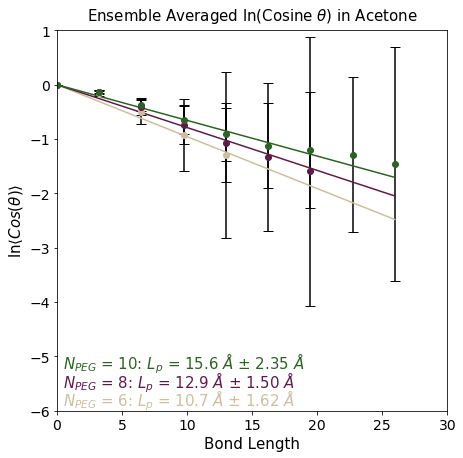

In [166]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10ace, gg_n6peg_n10ace, color='#CCBE9F')
plt.plot(blen_n10ace, gg_n8peg_n10ace, color='#601A4A')
plt.plot(blen_n10ace, gg_n10peg_ace, color='#2B6322')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in Acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,30)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 12.9 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 15.6 $\AA$ ± 2.35 $\AA$', fontsize=15, color='#2B6322')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [167]:
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone
0,3.752919,4.163319
1,4.207143,4.443474
2,3.664059,4.841516
3,3.655608,4.699104
4,3.804556,4.544883


In [168]:
rgpeg_olig_ace[r"$R_{g}$ [Angstrom] N = 10 PEG acetone"] = n10_blkspeg_ace["Avg Radius of gyration"]
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone
0,3.752919,4.163319,5.436221
1,4.207143,4.443474,5.859741
2,3.664059,4.841516,4.832483
3,3.655608,4.699104,5.656157
4,3.804556,4.544883,4.953166


In [169]:
pers_pegt_ace[r"$L_{p}$ [Angstrom] N = 10 PEG acetone "] = n10_blkspeg_ace["Avg persistence length"]
pers_pegt_ace

,$L_{p}$ [Angstrom] N = 6 PEG acetone,$L_{p}$ [Angstrom] N = 8 PEG acetone,$L_{p}$ [Angstrom] N = 10 PEG acetone
0,10.427323,10.539571,16.112348
1,13.775705,12.344046,18.476523
2,10.189399,15.047094,12.435127
3,9.105450,13.732459,17.557304
4,9.852551,12.611576,13.325469


### N = 20 PEG/acetone only

In [171]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_peg_ace = mda.Universe("n20peg_prod_ace/n20pegonly_ace.pdb", "n20peg_prod_ace/noace_n20peg.xtc")

In [172]:
n20_peg_ace.trajectory

<XTCReader n20peg_prod_ace/noace_n20peg.xtc with 18001 frames of 143 atoms>

In [173]:
len(n20_peg_ace.trajectory)

18001

In [174]:
#Select the polymer heavy atoms 
peg_n20ace = n20_peg_ace.select_atoms("resname sPEG PEG tPEG and not type H")

In [175]:
crv_n20peg_ace = pers_length(peg_n20ace,20)
crv_n20peg_ace

array([[ 1.        ,  0.99390874,  0.99370588,  0.99296465,  0.99290761,
         0.9929852 ,  0.99332762,  0.99334007,  0.9941362 ,  0.99275523,
         0.99246288,  0.99285913,  0.99211113,  0.99211047,  0.99175173,
         0.9943986 ,  0.99522968,  0.99552176,  0.99239112],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [176]:
com_bond_n20ace = np.zeros(shape=(1,18000))
count = 0
for ts in n20_peg_ace.trajectory[0:18000]:
    n20_mon1_ace = n20_peg_ace.select_atoms("resid 1")
    n20_mon2_ace = n20_peg_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1_ace.center_of_mass(), n20_mon2_ace.center_of_mass(), 
                                                   box=n20_peg_ace.trajectory.ts.dimensions)
    com_bond_n20ace[0, count] = oo_len
    count += 1
    

In [177]:
com_bond_n20ace

array([[3.36424411, 3.17486322, 3.30326713, ..., 3.18964249, 3.36797195,
        3.24979802]])

In [178]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2442991909861867

In [179]:
np.std(com_bond)

0.17413480862198993

In [180]:
np.mean(com_bond_n20ace)

3.2006153896338714

In [181]:
np.std(com_bond_n20ace)

0.17833133599017545

### Radius of Gyration vs. time N = 20 PEG/acetone

In [182]:
n20peg_rgens_ace, cor_n20peg_ace, N20peg_cos_ace, rgace_n20peg = get_rg_pers_poly(peg_n20ace, n20_peg_ace, 0, 18000)

In [183]:
n20peg_rgens_ace[0].shape

(18000,)

In [184]:
cor_n20peg_ace[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [185]:
N20peg_cos_ace

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99390874, 0.9560512 , 0.93401738, ..., 0.90092678, 0.90774286,
        0.91376617],
       [0.99370588, 0.91784148, 0.86223583, ..., 0.76082502, 0.78346558,
        0.77591092],
       ...,
       [0.99522968, 0.70032372, 0.62736355, ..., 0.46735552, 0.51224606,
        0.41030809],
       [0.99552176, 0.56994278, 0.45038713, ..., 0.59653689, 0.6702245 ,
        0.66671537],
       [0.99239112, 0.39277721, 0.10228492, ..., 0.90883306, 0.93943044,
        0.87438835]])

In [186]:
rgace_n20peg

7.438147650883116

In [187]:
np.std(n20peg_rgens_ace)

1.7126938982079978

(0.2, 2)

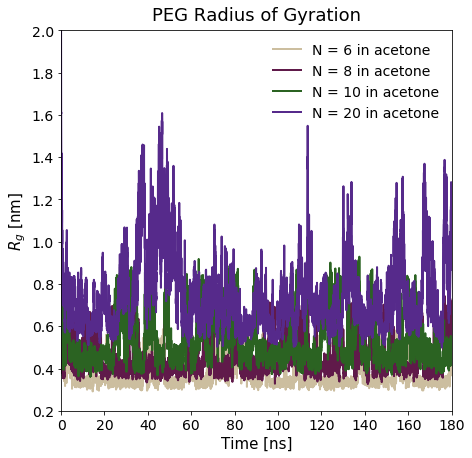

In [188]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8peg_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10peg_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20peg_rgens_ace[0]/10,linewidth=2, color='#562A8B')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 20 in acetone' ], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 20 PEG/acetone

In [189]:
# x values
blen_n20ace = cor_n20peg_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n20ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353, 29.19869272,
       32.44299191, 35.6872911 , 38.93159029, 42.17588948, 45.42018867,
       48.66448786, 51.90878706, 55.15308625, 58.39738544])

In [190]:
mk_n20p_ace = cor_n20peg_ace[1]/cor_n20peg_ace[0]
mk_n20p_ace

array([2.11946328e-17, 1.89334584e-02, 6.58615043e-02, 1.49021100e-01,
       2.64495330e-01, 4.01102799e-01, 5.44060761e-01, 6.59112048e-01,
       7.35264618e-01, 7.88920674e-01, 8.51449513e-01, 9.09508656e-01,
       9.80456984e-01, 1.05589693e+00, 1.13545837e+00, 1.21404682e+00,
       1.33397004e+00, 1.60740614e+00, 2.25165551e+00])

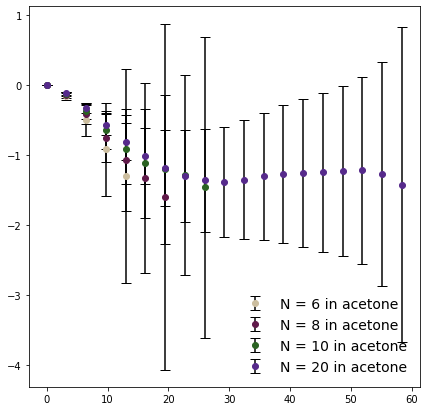

In [191]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20peg_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in acetone','N = 8 in acetone', 'N = 10 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)

In [230]:
# All the points give the best fits for N = 6 peg in water
n20_blkspeg_ace , n20peg_fitslpace = bavg_pers_cnt(5, peg_n20ace, n20_peg_ace, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 20.053624717222004
Error in Lp from fit [Angstroms], 95% CL : 0.22542199125094436
R2 score: 0.9890445095770333
6000
9000
Lp [Angstroms]: 15.716023375451039
Error in Lp from fit [Angstroms], 95% CL : 0.33343070622730875
R2 score: 0.964838697032644
9000
12000
Lp [Angstroms]: 16.30515954176731
Error in Lp from fit [Angstroms], 95% CL : 0.30001330741806265
R2 score: 0.9728219809931491
12000
15000
Lp [Angstroms]: 16.818962778940243
Error in Lp from fit [Angstroms], 95% CL : 0.31773549139868457
R2 score: 0.9714755228943384
15000
18000
Lp [Angstroms]: 17.283738325289786
Error in Lp from fit [Angstroms], 95% CL : 0.2732928495604698
R2 score: 0.9793915217332162


In [231]:
n20_blkspeg_ace

{'Avg Radius of gyration': array([9.0551408 , 6.7853868 , 6.93617556, 7.02415666, 7.80767924]),
 'Avg persistence length': array([20.05362472, 15.71602338, 16.30515954, 16.81896278, 17.28373833])}

In [232]:
n20peg_fitslpace

array([[ 2.00536247e+01,  1.57160234e+01,  1.63051595e+01,
         1.68189628e+01,  1.72837383e+01],
       [ 2.25421991e-01,  3.33430706e-01,  3.00013307e-01,
         3.17735491e-01,  2.73292850e-01],
       [-4.98662967e-02, -6.36293276e-02, -6.13302800e-02,
        -5.94566986e-02, -5.78578535e-02],
       [ 6.43969556e-04,  3.73495029e-03,  2.60990761e-03,
         2.58570471e-03,  1.71533960e-03]])

In [233]:
n20peg_fitslpace[2]

array([-0.0498663 , -0.06362933, -0.06133028, -0.0594567 , -0.05785785])

In [234]:
np.mean(n20peg_fitslpace[3])

0.00225797435360316

In [235]:
blen_n20ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353, 29.19869272,
       32.44299191, 35.6872911 , 38.93159029, 42.17588948, 45.42018867,
       48.66448786, 51.90878706, 55.15308625, 58.39738544])

In [236]:
gg_n20peg_ace = line_fit(np.mean(n20peg_fitslpace[2]),blen_n20ace)

In [237]:
gg_n10peg_n20ace = line_fit(np.mean(n10peg_fitslpace[2]),blen_n20ace)

In [238]:
gg_n8peg_n20ace = line_fit(np.mean(n8peg_fitslpace[2]),blen_n20ace)

In [239]:
gg_n6peg_n20ace = line_fit(np.mean(n6peg_fitslpace[2]),blen_n20ace)

In [240]:
gg_n20peg_ace

array([-0.        , -0.18955821, -0.37911642, -0.56867463, -0.75823284,
       -0.94779105, -1.13734926, -1.32690746, -1.51646567, -1.70602388,
       -1.89558209, -2.0851403 , -2.27469851, -2.46425672, -2.65381493,
       -2.84337314, -3.03293135, -3.22248956, -3.41204777])

### Block averaged Radius of gyration and persistence length, N = 20 PEG/acetone

In [241]:
np.mean(n20_blkspeg_ace["Avg persistence length"])

17.235501747734077

In [242]:
np.std(n20_blkspeg_ace["Avg persistence length"])

1.502797371246875

In [243]:
np.mean(n20_blkspeg_ace["Avg Radius of gyration"])

7.521707811878551

In [244]:
np.std(n20_blkspeg_ace["Avg Radius of gyration"])

0.8444844799775151

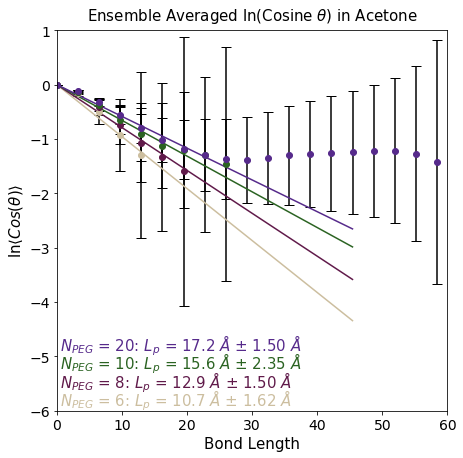

In [249]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20peg_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20ace[:15], gg_n6peg_n20ace[:15], color='#CCBE9F')
plt.plot(blen_n20ace[:15], gg_n8peg_n20ace[:15], color='#601A4A')
plt.plot(blen_n20ace[:15], gg_n10peg_n20ace[:15], color='#2B6322')
plt.plot(blen_n20ace[:15], gg_n20peg_ace[:15], color='#562A8B')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in Acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,60)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 12.9 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 15.6 $\AA$ ± 2.35 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 17.2 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#562A8B')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [246]:
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone
0,3.752919,4.163319,5.436221,9.055141
1,4.207143,4.443474,5.859741,6.785387
2,3.664059,4.841516,4.832483,6.936176
3,3.655608,4.699104,5.656157,7.024157
4,3.804556,4.544883,4.953166,7.807679


In [247]:
rgpeg_olig_ace[r"$R_{g}$ [Angstrom] N = 20 PEG acetone"] = n20_blkspeg_ace["Avg Radius of gyration"]
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone
0,3.752919,4.163319,5.436221,9.055141
1,4.207143,4.443474,5.859741,6.785387
2,3.664059,4.841516,4.832483,6.936176
3,3.655608,4.699104,5.656157,7.024157
4,3.804556,4.544883,4.953166,7.807679


In [248]:
pers_pegt_ace[r"$L_{p}$ [Angstrom] N = 20 PEG acetone "] = n20_blkspeg_ace["Avg persistence length"]
pers_pegt_ace

,$L_{p}$ [Angstrom] N = 6 PEG acetone,$L_{p}$ [Angstrom] N = 8 PEG acetone,$L_{p}$ [Angstrom] N = 10 PEG acetone,$L_{p}$ [Angstrom] N = 20 PEG acetone
0,10.427323,10.539571,16.112348,20.053625
1,13.775705,12.344046,18.476523,15.716023
2,10.189399,15.047094,12.435127,16.305160
3,9.105450,13.732459,17.557304,16.818963
4,9.852551,12.611576,13.325469,17.283738


### N = 30 PEG/acetone only

In [253]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_peg_ace = mda.Universe("n30peg_prod_ace/n30pegonly_ace.pdb", "n30peg_prod_ace/noace_n30peg.xtc")

In [254]:
n30_peg_ace.trajectory

<XTCReader n30peg_prod_ace/noace_n30peg.xtc with 18001 frames of 213 atoms>

In [255]:
len(n30_peg_ace.trajectory)

18001

In [256]:
#Select the polymer heavy atoms 
peg_n30ace = n30_peg_ace.select_atoms("resname sPEG PEG tPEG and not type H")

In [257]:
crv_n30peg_ace = pers_length(peg_n30ace,30)
crv_n30peg_ace

array([[ 1.00000000e+00,  9.30685617e-01,  8.42835729e-01,
         7.90500888e-01,  7.71444443e-01,  7.60619556e-01,
         7.43242396e-01,  7.37386828e-01,  7.35742317e-01,
         7.30128840e-01,  7.39805723e-01,  7.09935423e-01,
         6.88828580e-01,  6.74077595e-01,  6.65456139e-01,
         6.54366991e-01,  6.24119131e-01,  6.04591632e-01,
         5.91284520e-01,  5.67021505e-01,  5.23246133e-01,
         4.74407792e-01,  4.31672986e-01,  4.02245649e-01,
         3.61589995e-01,  2.50650578e-01,  1.55705502e-01,
        -5.93313645e-02, -9.85935978e-02],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         3.00000000e+00,  4.00000000e+00,  5.00000000e+00,
         6.00000000e+00,  7.00000000e+00,  8.00000000e+00,
         9.00000000e+00,  1.00000000e+01,  1.10000000e+01,
         1.20000000e+01,  1.30000000e+01,  1.40000000e+01,
         1.50000000e+01,  1.60000000e+01,  1.70000000e+01,
         1.80000000e+01,  1.90000000e+01,  2.00000000e+01,
         2.10

In [258]:
com_bond_n30ace = np.zeros(shape=(1,18000))
count = 0
for ts in n30_peg_ace.trajectory[0:18000]:
    n30_mon1_ace = n30_peg_ace.select_atoms("resid 1")
    n30_mon2_ace = n30_peg_ace.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1_ace.center_of_mass(), n30_mon2_ace.center_of_mass(), 
                                                   box=n30_peg_ace.trajectory.ts.dimensions)
    com_bond_n30ace[0, count] = oo_len
    count += 1
    

In [259]:
com_bond_n30ace

array([[3.27241698, 3.09227833, 3.04944713, ..., 3.23381209, 3.28609871,
        3.19639866]])

In [260]:
lb_avg_pn6 = np.mean(com_bond)
lb_avg_pn6

3.2442991909861867

In [261]:
np.std(com_bond)

0.17413480862198993

In [262]:
np.mean(com_bond_n30ace)

3.196659738893472

In [263]:
np.std(com_bond_n30ace)

0.1743092957295341

### Radius of Gyration vs. time N = 30 PEG/acetone

In [264]:
n30peg_rgens_ace, cor_n30peg_ace, N30peg_cos_ace, rgace_n30peg = get_rg_pers_poly(peg_n30ace, n30_peg_ace, 0, 18000)

In [265]:
n30peg_rgens_ace[0].shape

(18000,)

In [266]:
cor_n30peg_ace[3]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

In [267]:
N30peg_cos_ace

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93068562,  0.92448068,  0.92568567, ...,  0.90499577,
         0.9112921 ,  0.90367464],
       [ 0.84283573,  0.82430784,  0.84306771, ...,  0.75796496,
         0.78311579,  0.75058675],
       ...,
       [ 0.1557055 ,  0.43849543,  0.76599683, ..., -0.26220549,
        -0.37080564, -0.42396382],
       [-0.05933136,  0.42856672,  0.72545717, ..., -0.29019497,
        -0.35353409, -0.50383283],
       [-0.0985936 ,  0.23558459,  0.83045011, ..., -0.43097676,
        -0.33249469, -0.45521288]])

In [268]:
rgace_n30peg

9.115670944572981

In [269]:
np.std(n30peg_rgens_ace)

1.9620922162618808

(0.2, 3)

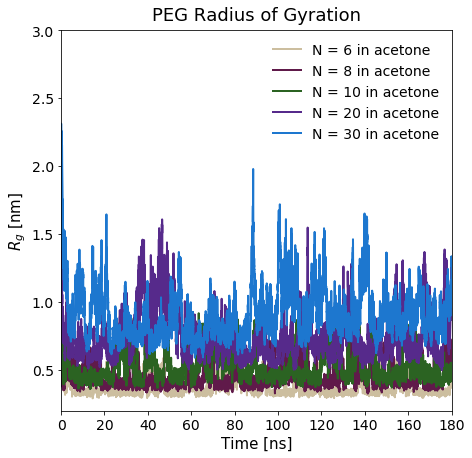

In [270]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens_ace[0]/10,linewidth=2, color='#CCBE9F')
plt.plot(trj_len/100, n8peg_rgens_ace[0]/10,linewidth=2, color='#601A4A')
plt.plot(trj_len/100, n10peg_rgens_ace[0]/10,linewidth=2, color='#2B6322')
plt.plot(trj_len/100, n20peg_rgens_ace[0]/10,linewidth=2, color='#562A8B')
plt.plot(trj_len/100, n30peg_rgens_ace[0]/10,linewidth=2, color='#1D77CF')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 20 in acetone', 'N = 30 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 30 PEG/acetone

In [271]:
# x values
blen_n30ace = cor_n30peg_ace[3]*lb_avg_pn6
#nt_tt[0] = 0
blen_n30ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353, 29.19869272,
       32.44299191, 35.6872911 , 38.93159029, 42.17588948, 45.42018867,
       48.66448786, 51.90878706, 55.15308625, 58.39738544, 61.64168463,
       64.88598382, 68.13028301, 71.3745822 , 74.61888139, 77.86318058,
       81.10747977, 84.35177897, 87.59607816, 90.84037735])

In [272]:
mk_n30p_ace = cor_n30peg_ace[1]/cor_n30peg_ace[0]
mk_n30p_ace

array([1.43329176e-18, 1.44213008e-02, 4.72287480e-02, 1.01319188e-01,
       1.64400160e-01, 2.31655662e-01, 3.07702400e-01, 3.91609944e-01,
       4.73510166e-01, 5.45039783e-01, 6.09891896e-01, 6.59578024e-01,
       7.05759692e-01, 7.29617125e-01, 7.52146666e-01, 7.81336738e-01,
       8.17880823e-01, 8.78788955e-01, 9.59098653e-01, 1.04874360e+00,
       1.15147979e+00, 1.26134891e+00, 1.32481577e+00, 1.34285062e+00,
       1.32962718e+00, 1.32034043e+00, 1.36100089e+00, 1.48165080e+00,
       1.86608066e+00])

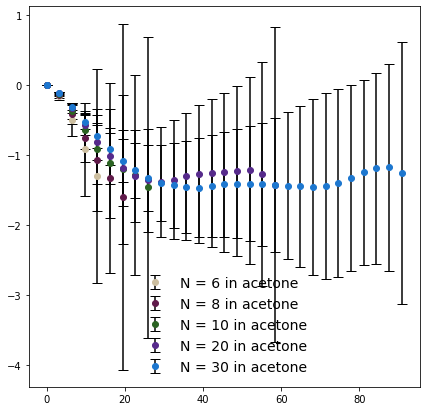

In [273]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20peg_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30ace, np.log(cor_n30peg_ace[0]), yerr=mk_n30p_ace, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in acetone','N = 8 in acetone', 'N = 10 in acetone','N = 20 in acetone'
            ,'N = 30 in acetone' ], frameon=False, fontsize=14)

In [274]:
# All the points give the best fits for N = 6 peg in water
n30_blkspeg_ace , n30peg_fitslpace = bavg_pers_cnt(5, peg_n30ace, n30_peg_ace, lb_avg_pn6, 5, 3000 , 18000)

3000
6000
Lp [Angstroms]: 18.516290571768543
Error in Lp from fit [Angstroms], 95% CL : 0.14010879545768967
R2 score: 0.9803947418592506
6000
9000
Lp [Angstroms]: 18.09640589346033
Error in Lp from fit [Angstroms], 95% CL : 0.14673545397541246
R2 score: 0.9777402407215944
9000
12000
Lp [Angstroms]: 18.01524169468525
Error in Lp from fit [Angstroms], 95% CL : 0.12929932628267335
R2 score: 0.9822105273237395
12000
15000
Lp [Angstroms]: 19.773872953083035
Error in Lp from fit [Angstroms], 95% CL : 0.12329717844737369
R2 score: 0.9862955966785688
15000
18000
Lp [Angstroms]: 19.010267292789774
Error in Lp from fit [Angstroms], 95% CL : 0.13120624344817186
R2 score: 0.9834552880904369


In [275]:
n30_blkspeg_ace

{'Avg Radius of gyration': array([8.18290631, 8.30183974, 9.95921564, 9.58525696, 9.01848994]),
 'Avg persistence length': array([18.51629057, 18.09640589, 18.01524169, 19.77387295, 19.01026729])}

In [276]:
n30peg_fitslpace

array([[ 1.85162906e+01,  1.80964059e+01,  1.80152417e+01,
         1.97738730e+01,  1.90102673e+01],
       [ 1.40108795e-01,  1.46735454e-01,  1.29299326e-01,
         1.23297178e-01,  1.31206243e-01],
       [-5.40064975e-02, -5.52595916e-02, -5.55085531e-02,
        -5.05717824e-02, -5.26031531e-02],
       [ 1.41511011e-03,  1.70128154e-03,  1.34495433e-03,
         8.42586902e-04,  1.11694425e-03]])

In [277]:
n30peg_fitslpace[2]

array([-0.0540065 , -0.05525959, -0.05550855, -0.05057178, -0.05260315])

In [278]:
np.mean(n30peg_fitslpace[3])

0.0012841754266125986

In [279]:
blen_n30ace

array([ 0.        ,  3.24429919,  6.48859838,  9.73289757, 12.97719676,
       16.22149595, 19.46579515, 22.71009434, 25.95439353, 29.19869272,
       32.44299191, 35.6872911 , 38.93159029, 42.17588948, 45.42018867,
       48.66448786, 51.90878706, 55.15308625, 58.39738544, 61.64168463,
       64.88598382, 68.13028301, 71.3745822 , 74.61888139, 77.86318058,
       81.10747977, 84.35177897, 87.59607816, 90.84037735])

In [280]:
gg_n30peg_ace = line_fit(np.mean(n30peg_fitslpace[2]),blen_n20ace)

In [281]:
gg_n20peg_n30ace = line_fit(np.mean(n20peg_fitslpace[2]),blen_n20ace)

In [282]:
gg_n10peg_n30ace = line_fit(np.mean(n10peg_fitslpace[2]),blen_n20ace)

In [283]:
gg_n8peg_n30ace = line_fit(np.mean(n8peg_fitslpace[2]),blen_n20ace)

In [284]:
gg_n6peg_n30ace = line_fit(np.mean(n6peg_fitslpace[2]),blen_n20ace)

In [285]:
gg_n30peg_ace

array([-0.        , -0.17386172, -0.34772344, -0.52158516, -0.69544688,
       -0.8693086 , -1.04317032, -1.21703204, -1.39089376, -1.56475548,
       -1.7386172 , -1.91247892, -2.08634064, -2.26020235, -2.43406407,
       -2.60792579, -2.78178751, -2.95564923, -3.12951095])

### Block averaged Radius of gyration and persistence length, N = 30 PEG/acetone

In [286]:
np.mean(n30_blkspeg_ace["Avg persistence length"])

18.682415681157387

In [287]:
np.std(n30_blkspeg_ace["Avg persistence length"])

0.6503678662358189

In [288]:
np.mean(n30_blkspeg_ace["Avg Radius of gyration"])

9.009541715167106

In [289]:
np.std(n30_blkspeg_ace["Avg Radius of gyration"])

0.6953526956528919

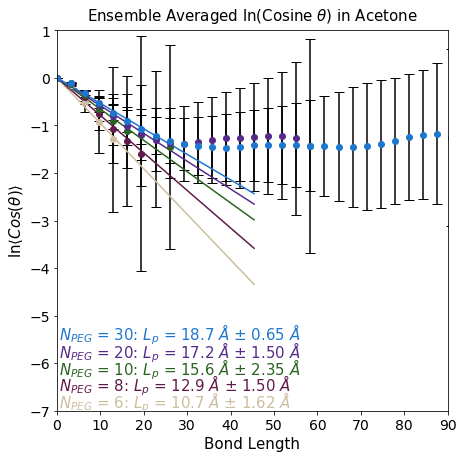

In [298]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ace, np.log(cor_n6peg_ace[0]), yerr=mk_n6p_ace, color='#CCBE9F', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8ace, np.log(cor_n8peg_ace[0]), yerr=mk_n8p_ace, color='#601A4A', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10ace, np.log(cor_n10peg_ace[0]), yerr=mk_n10p_ace, color='#2B6322', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20ace, np.log(cor_n20peg_ace[0]), yerr=mk_n20p_ace, color='#562A8B', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30ace, np.log(cor_n30peg_ace[0]), yerr=mk_n30p_ace, color='#1D77CF', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30ace[:15], gg_n6peg_n30ace[:15], color='#CCBE9F')
plt.plot(blen_n30ace[:15], gg_n8peg_n30ace[:15], color='#601A4A')
plt.plot(blen_n30ace[:15], gg_n10peg_n30ace[:15], color='#2B6322')
plt.plot(blen_n30ace[:15], gg_n20peg_n30ace[:15], color='#562A8B')
plt.plot(blen_n30ace[:15], gg_n30peg_ace[:15], color='#1D77CF')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in Acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1)
plt.xlim(0,90)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -6.94,r'$N_{PEG}$ = 6: $L_{p}$ = 10.7 $\AA$ ± 1.62 $\AA$', fontsize=15, color='#CCBE9F')
plt.text(0.5,-6.58,r'$N_{PEG}$ = 8: $L_{p}$ = 12.9 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#601A4A')
plt.text(0.5,-6.23,r'$N_{PEG}$ = 10: $L_{p}$ = 15.6 $\AA$ ± 2.35 $\AA$', fontsize=15, color='#2B6322')
plt.text(0.5,-5.88,r'$N_{PEG}$ = 20: $L_{p}$ = 17.2 $\AA$ ± 1.50 $\AA$', fontsize=15, color='#562A8B')
plt.text(0.5,-5.50,r'$N_{PEG}$ = 30: $L_{p}$ = 18.7 $\AA$ ± 0.65 $\AA$', fontsize=15, color='#1D77CF')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [290]:
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone
0,3.752919,4.163319,5.436221,9.055141
1,4.207143,4.443474,5.859741,6.785387
2,3.664059,4.841516,4.832483,6.936176
3,3.655608,4.699104,5.656157,7.024157
4,3.804556,4.544883,4.953166,7.807679


In [291]:
rgpeg_olig_ace[r"$R_{g}$ [Angstrom] N = 30 PEG acetone"] = n30_blkspeg_ace["Avg Radius of gyration"]
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone,$R_{g}$ [Angstrom] N = 30 PEG acetone
0,3.752919,4.163319,5.436221,9.055141,8.182906
1,4.207143,4.443474,5.859741,6.785387,8.301840
2,3.664059,4.841516,4.832483,6.936176,9.959216
3,3.655608,4.699104,5.656157,7.024157,9.585257
4,3.804556,4.544883,4.953166,7.807679,9.018490


In [292]:
pers_pegt_ace[r"$L_{p}$ [Angstrom] N = 30 PEG acetone "] = n30_blkspeg_ace["Avg persistence length"]
pers_pegt_ace

,$L_{p}$ [Angstrom] N = 6 PEG acetone,$L_{p}$ [Angstrom] N = 8 PEG acetone,$L_{p}$ [Angstrom] N = 10 PEG acetone,$L_{p}$ [Angstrom] N = 20 PEG acetone,$L_{p}$ [Angstrom] N = 30 PEG acetone
0,10.427323,10.539571,16.112348,20.053625,18.516291
1,13.775705,12.344046,18.476523,15.716023,18.096406
2,10.189399,15.047094,12.435127,16.305160,18.015242
3,9.105450,13.732459,17.557304,16.818963,19.773873
4,9.852551,12.611576,13.325469,17.283738,19.010267


In [319]:
rgpeg_olig_ace

,$R_{g}$ [Angstrom] N = 6 PEG acetone,$R_{g}$ [Angstrom] N = 8 PEG acetone,$R_{g}$ [Angstrom] N = 10 PEG acetone,$R_{g}$ [Angstrom] N = 20 PEG acetone,$R_{g}$ [Angstrom] N = 30 PEG acetone
0,3.752919,4.163319,5.436221,9.055141,8.182906
1,4.207143,4.443474,5.859741,6.785387,8.301840
2,3.664059,4.841516,4.832483,6.936176,9.959216
3,3.655608,4.699104,5.656157,7.024157,9.585257
4,3.804556,4.544883,4.953166,7.807679,9.018490


In [320]:
rgpeg_olig_ace.to_pickle("PEG_acetone_Rg.pkl")

In [ ]:
pers_pegt_ace

In [321]:
pers_pegt_ace.to_pickle("PEG_acetone_Lp.pkl")

### Fluory Exponent, PEG/acetone systems 

In [299]:
n_peg = np.array([6,8,10,20,30])
rg_npeg_ace = np.array([np.mean(n6_blkspeg_ace["Avg Radius of gyration"])
                    ,np.mean(n8_blkspeg_ace["Avg Radius of gyration"]),np.mean(n10_blkspeg_ace["Avg Radius of gyration"])
                    ,np.mean(n20_blkspeg_ace["Avg Radius of gyration"]),np.mean(n30_blkspeg_ace["Avg Radius of gyration"])])

In [300]:
rg_npeg_ace

array([3.8168571 , 4.53845919, 5.34755351, 7.52170781, 9.00954172])

In [301]:
rgace_npeg_std = np.array([np.std(np.log10(n6_blkspeg_ace["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blkspeg_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blkspeg_ace["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blkspeg_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blkspeg_ace["Avg Radius of gyration"]))])
rgace_npeg_std

array([0.02239654, 0.02237553, 0.03242563, 0.04657558, 0.03352248])

In [302]:
n_peg

array([ 6,  8, 10, 20, 30])

In [303]:
np.log10(rg_npeg_ace)

array([0.5817059 , 0.65690843, 0.72815514, 0.87631646, 0.9547027 ])

In [304]:
np.log10(n_peg)

array([0.77815125, 0.90308999, 1.        , 1.30103   , 1.47712125])

In [305]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vace = LinearRegression(fit_intercept=True)
model_vace.fit(np.log10(n_peg).reshape(-1,1), np.log10(rg_npeg_ace))
# Slope here is in nanometers
print("Model slope:    ", model_vace.coef_[0])
print("Model intercept:", model_vace.intercept_)

Model slope:     0.5308599374077543
Model intercept: 0.17992317592296458


In [306]:
gg_ace = model_vace.predict(np.log10(n_peg.reshape(-1,1)))
gg_ace

array([0.5930125 , 0.65933747, 0.71078311, 0.87058788, 0.96406767])

In [307]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_npeg_ace), gg_ace))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_npeg_ace), gg_ace))

Mean Std Error: 0.00011120920208168044
R2 score: 0.9941387668396506


In [308]:
# Residuals between the true y data and model y data 
resid_vace = np.log10(rg_npeg_ace) - gg_ace
resid_vace

array([-0.0113066 , -0.00242904,  0.01737203,  0.00572858, -0.00936497])

In [309]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_peg)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

0.334663876760361

In [310]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

2.7764451051977987

In [311]:
# How to calculate 95% confidence interval for the slope 
flc_vace = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_vace**2)/len(resid_vace))/(np.sum(nhui_ace)))
flc_vace

0.050612178929919954

Text(1.1, 0.75, '$v_{acetone}$ = 0.53 ± 0.06')

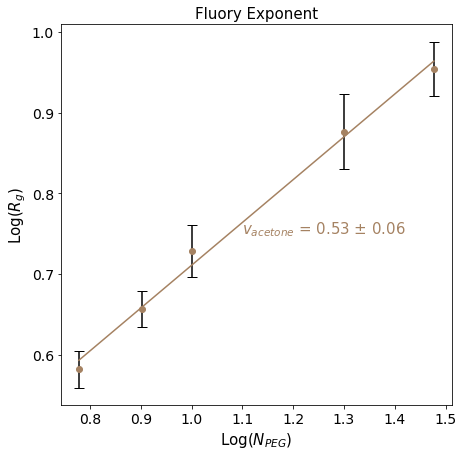

In [318]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_peg), np.log10(rg_npeg_ace), yerr=rgace_npeg_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_peg), gg_ace, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.75, r'$v_{acetone}$ = 0.53 ± 0.06', fontsize=15, color='#A58262')